## Tarefa 1 - Painel de visualização de dados (Dashboard)

Você deve desenvolver um painel de visualização de dados (Dashboard) para uma determinada empresa ou projeto. 
O painel deve apresentar no mínimo seis elementos gráficos de representação de dados. 
Tais gráficos e cores devem ser desenvolvidos baseados nos conceitos e técnicas vistas na disciplina e, preferencialmente, com o uso das ferramentas apresentadas na disciplina. 
A entrega do painel poderá ser feita através de screenshots em um PDF. 
No caso da entrega do painel ser realizada em código, é preciso enviar também um arquivo com as instruções para rodar o código.

Além do painel, você deve entregar um sucinto relatório (de 2 a 3 pg.) apresentando o contexto do dado utilizado e ramo de atividade da empresa ou descrição do projeto, as análises realizadas e os insights encontrados. Relate também análises que foram realizadas mesmo que aparentemente não tenham resultado em insights relevantes. Esse relatório deve ser entregue em formato PDF.


# NOME: MARCIO DE LIMA

## Introdução e Objetivos

Nesta tarefa usei um dataset disponível no Kaggle, cujo link está logo abaixo. 

https://www.kaggle.com/spscientist/students-performance-in-exams

Lista de Colunas

1) gender: 

    Feminino ou Masculino;
    
2) race/ethnicity:

    5 grupos. Segundo o site (https://research.collegeboard.org/about-us/changes-to-race-ethnicity-reporting), os grupos estão classificados em: 

    Grupo A - American Indian or Alaska Native

    Grupo B - Asian (including Indian subcontinent and Philippines origin)

    Grupo C - Black or African American

    Grupo D - White (including Middle Eastern origin)

    Grupo E - Native Hawaiian or Other Pacific Islander

3) parental level of education (nível de educação dos pais)

    some college          Alguma graduação sem diploma

    associate's degree    Graduações tecnológicas 

    high school           Ensino Médio completo

    some high school      Ensino médio incompleto

    bachelor's degree     Graduações Bachareladas

    master's degree       Pós-Graduação / Mestrado

4) test preparation course

    Sim (completed) ou Não (none)

5) lunch

6) math score

7) reading score

8) writing score


O dataset está em inglês, mas ele reporta as notas (scores) de estudantes do ensino médio dos Estados Unidos.  

Meu objetivo é demonstrar através dos gráficos e dash's a relação dos dados contidos no dataset (estudo dos pais, preparação, sexo, etc.) podem influenciar no desempenho dos alunos (notas / scores).  

Essa tarefa apresentará os fontes em python, as bibliotecas utilizadas, os resultados passo a passo observados (insights) e no final, juntará os gráficos individuais num Dashboard que irá resumir as relações e influências dos dados. 

Alguns dados serão traduzidos para o Português para melhorar a compreensão. Acima, temos algumas traduções e classificações dos itens do dataSet. Devido ao tamanho dos nomes de etnia/raças, mantive a classificação em grupos, assim como, os níveis de educação. 

Let's go!!


In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Importando o arquivo 
df = pd.read_csv('data/StudentsPerformance.csv', sep=",")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Verificando dados nulos
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
#Traducao
df['gender'] = df['gender'].map(lambda x: 'Masculino' if x == 'male' else 'Feminino' )
df['test preparation course'] = df['test preparation course'].map(lambda x: 'Nao' if x == 'none' else 'Sim' )

df['parental level of education'] = df['parental level of education'].map(lambda x: 'Graduações Tecnológicas' if x == "associate's degree" else x)
df['parental level of education'] = df['parental level of education'].map(lambda x: 'Graduações Bachareladas' if x == "bachelor's degree" else x)
df['parental level of education'] = df['parental level of education'].map(lambda x: 'Ensino Médio' if x == "high school" else x)
df['parental level of education'] = df['parental level of education'].map(lambda x: 'Pós-Graduação/Mestrado' if x == "master's degree" else x)
df['parental level of education'] = df['parental level of education'].map(lambda x: 'Outros' if x == "some college" else x)
df['parental level of education'] = df['parental level of education'].map(lambda x: 'Outros' if x == "some high school" else x)

df['lunch'] = df['lunch'].map(lambda x: 'Sim' if x == 'standard' else 'Nao' )

In [6]:
#Criando novas colunas - Avaliação das Notas - Nota de Corte - 65
df["math_resultado"] = np.where(df["math score"]<65,"Reprovado" , "Aprovado")
df["reading_resultado"] = np.where(df["reading score"]<65, "Reprovado" , "Aprovado")
df["writing_resultado"] = np.where(df["writing score"]<65, "Reprovado" , "Aprovado")


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_resultado,reading_resultado,writing_resultado
0,Feminino,group B,Graduações Bachareladas,Sim,Nao,72,72,74,Aprovado,Aprovado,Aprovado
1,Feminino,group C,Outros,Sim,Sim,69,90,88,Aprovado,Aprovado,Aprovado
2,Feminino,group B,Pós-Graduação/Mestrado,Sim,Nao,90,95,93,Aprovado,Aprovado,Aprovado
3,Masculino,group A,Graduações Tecnológicas,Nao,Nao,47,57,44,Reprovado,Reprovado,Reprovado
4,Masculino,group C,Outros,Sim,Nao,76,78,75,Aprovado,Aprovado,Aprovado


# Gráficos de Análise Exploratória

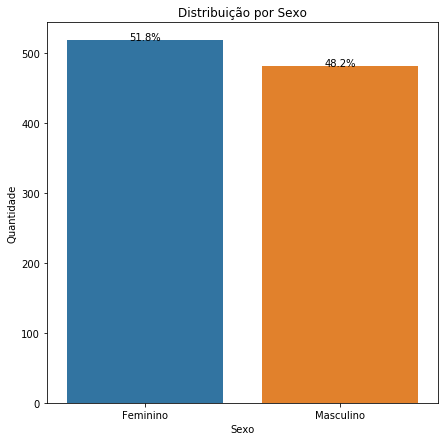

In [19]:
#Distribuicao Sexo

fig = plt.figure(figsize = (7,7))
ax = sns.barplot(y = df['gender'].value_counts(),x = df['gender'].value_counts().index)
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.title('Distribuição por Sexo')
total = len(df['gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + (p.get_width()/2.5)
        y = p.get_y() + p.get_height() - 0.02
        ax.annotate(percentage, (x, y))
        
plt.show()


Estudantes Homens   = 48.2%

Estudantes Mulheres = 51.8%

Ps.: As mulheres já começaram na frente. Mas o dataset está balanceado. 

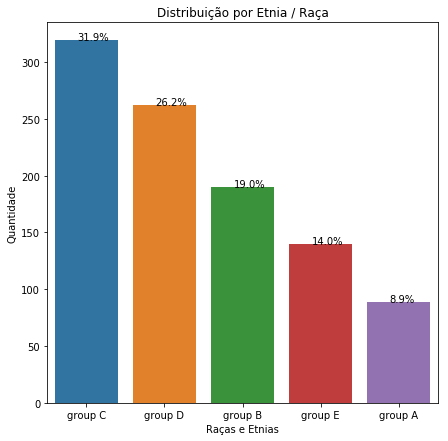

In [24]:
# Distribuição por etnia / raça
plt.figure(figsize=(7,7))
ax=sns.barplot(x=df['race/ethnicity'].value_counts().index,
              y=df['race/ethnicity'].value_counts().values)
plt.xlabel('Raças e Etnias')
plt.ylabel('Quantidade')
plt.title('Distribuição por Etnia / Raça')
total = len(df['race/ethnicity'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + (p.get_width()/2.8)
        y = p.get_y() + p.get_height() - 0.02
        ax.annotate(percentage, (x, y))
plt.show()


A grande maioria dos alunos pertence ao grupo C (31.9%), o grupo com menor quantidade é o grupo A com 8.9% do total de estudantes.

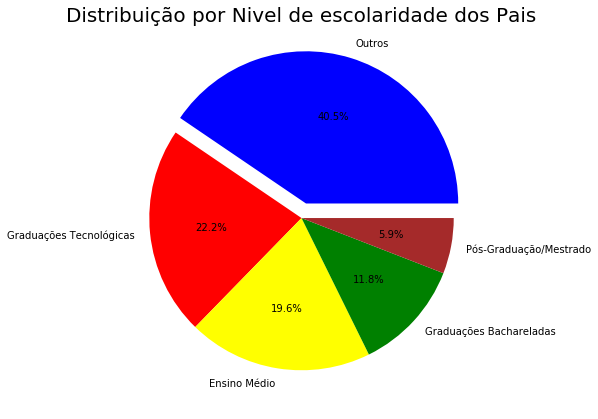

In [28]:
# Distribuição por Nivel de escolaridade dos Pais
nivel = df['parental level of education'].value_counts()

labels=nivel.index
colors=['blue','red','yellow','green','brown']
explode=[0.1,0,0,0,0]
values=nivel.values

#visualization
plt.figure(figsize=(12,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Distribuição por Nivel de escolaridade dos Pais',color='black',fontsize=20)
plt.show()



A grande maioria dos pais dos alunos está nos grupos "Outros (Alguma Graduação incompleta ou ensino médio incompleto)" e "Graduações Tecnológicas". O menor grupo é o "Pós-Graduação/Mestrado".


In [29]:
df['lunch'].value_counts()

Sim    645
Nao    355
Name: lunch, dtype: int64

In [30]:
df['test preparation course'].value_counts()

Nao    642
Sim    358
Name: test preparation course, dtype: int64

Grande parte dos alunos não possuem o teste preparatório => 64,2%

Grande parte dos alunos tiveram uma refeição completa antes do exame => 64,5% 

# Gerando Insigths através do cruzamento de variáveis com as notas

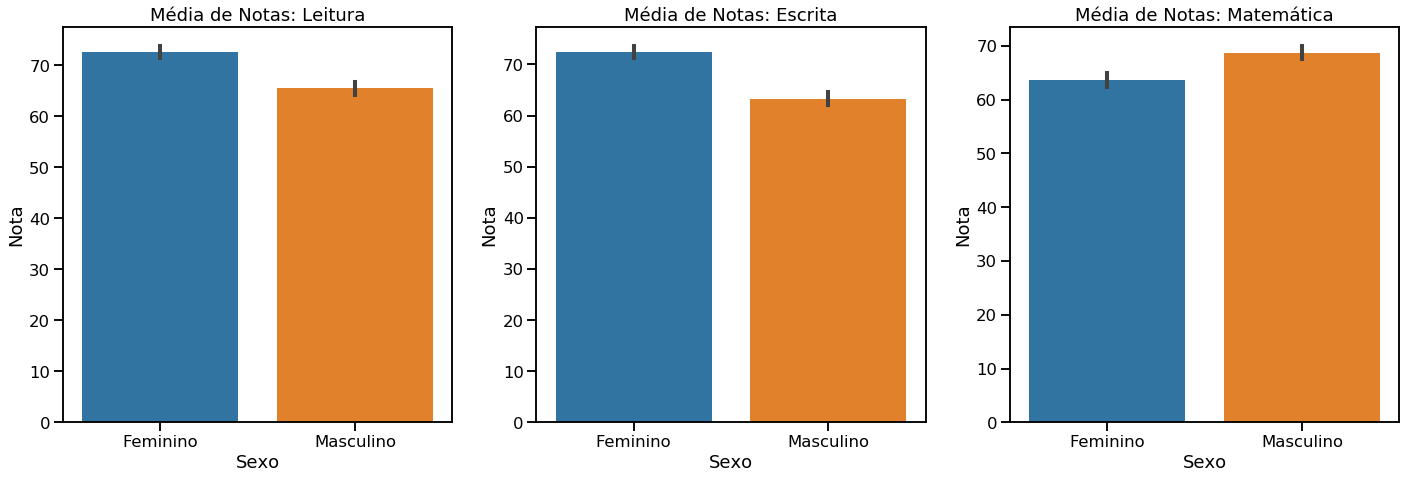

In [53]:
#Notas por Sexo
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
ax=sns.barplot(x = 'gender', y = 'reading score', data = df)
plt.xlabel('Sexo')
plt.ylabel('Nota')
plt.title('Média de Notas: Leitura')

plt.subplot(1,3,2)
ax1=sns.barplot(x = 'gender', y = 'writing score', data = df)
plt.xlabel('Sexo')
plt.ylabel('Nota')
plt.title('Média de Notas: Escrita')

plt.subplot(1,3,3)
ax2=sns.barplot(x = 'gender', y = 'math score', data = df)
plt.xlabel('Sexo')
plt.ylabel('Nota')
plt.title('Média de Notas: Matemática')

plt.tight_layout()

Através do gráfico acima, chegamos a conclusão que os estudantes femininos tiveram notas maiores nas avaliações de Reading e de Writing, perdendo somente para os estudantes masculinos na avaliação de Math. 

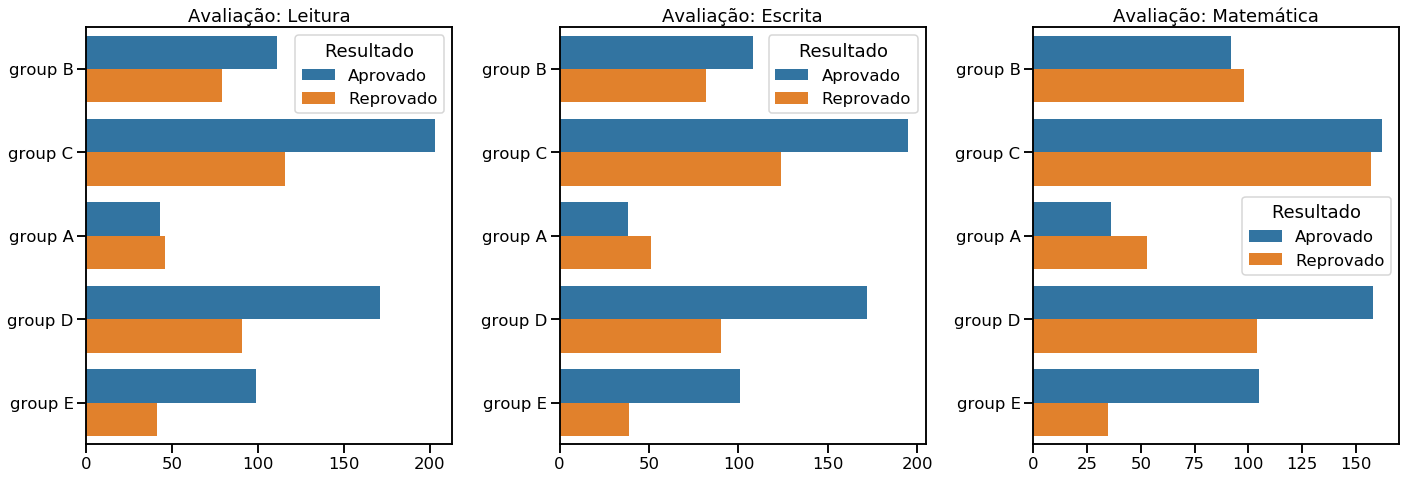

In [42]:
#Resultado das avaliações (Aprovado-Reprovado) por Etnia/Raça
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.countplot(y = 'race/ethnicity', hue = 'reading_resultado', data = df)
plt.xlabel('')
plt.ylabel('')
plt.title('Avaliação: Leitura')
plt.legend(title="Resultado")

plt.subplot(1,3,2)
sns.countplot(y = 'race/ethnicity', hue = 'writing_resultado', data = df)
plt.xlabel('')
plt.ylabel('')
plt.title('Avaliação: Escrita')
plt.legend(title="Resultado")

plt.subplot(1,3,3)
sns.countplot(y = 'race/ethnicity', hue = 'math_resultado', data = df)
plt.xlabel('')
plt.ylabel('')
plt.title('Avaliação: Matemática')
plt.legend(title="Resultado")

plt.tight_layout()

Pelos gráficos acima, concluímos os insights abaixo: 

1) Notamos que os estudantes do Grupo C tiveram a maior quantidade de aprovações nas três matérias, mas que tiveram o maior número de reprovações em Math comparando com os demais grupos. 

2) A matéria Math possui a maior quantidade de reprovações do que todas as outras. 

3) Os estudantes do grupo D tiveram o melhor desempenho de aprovações nas três matérias. 

4) Os estudantes do grupo A tiveram o pior desempenho de aprovações nas três matérias.

5) Os estudantes do grupo B possui mais reprovações do que aprovações na matéria Math. 

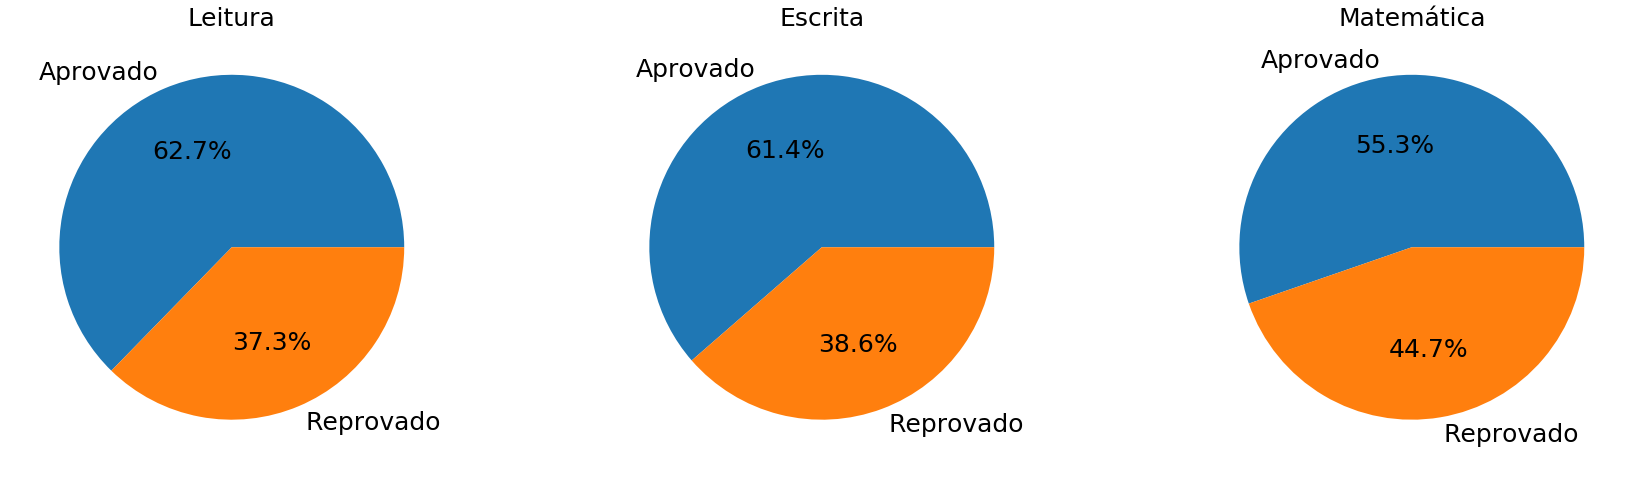

In [40]:
#Resultado das avaliações (Aprovado-Reprovado) por Materia

plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
nivel1 = df['reading_resultado'].value_counts()
labels1=nivel1.index
explode=[0, 0]
values1=nivel1.values

plt.pie(values1,explode=explode,labels=labels1,autopct='%1.1f%%',textprops={'fontsize': 25})
plt.title('Leitura',color='black',fontsize=25)

plt.subplot(1,3,2)
nivel2 = df['writing_resultado'].value_counts()
labels2=nivel2.index
explode=[0, 0]
values2=nivel2.values

plt.pie(values2,explode=explode,labels=labels2,autopct='%1.1f%%',textprops={'fontsize': 25})
plt.title('Escrita',color='black',fontsize=25)

plt.subplot(1,3,3)
nivel3 = df['math_resultado'].value_counts()
labels3=nivel3.index
explode=[0, 0]
values3=nivel3.values

plt.pie(values3,explode=explode,labels=labels3,autopct='%1.1f%%',textprops={'fontsize': 25})
plt.title('Matemática',color='black',fontsize=25)

plt.tight_layout()

Visualização em porcentagem demonstrando melhor os resultados de aprovação dos estudantes por matéria. Observando que a matéria de Math tem a menor aprovação entre os estudantes. Mesmo assim, todas as três matérias possum porcentagem de reprovações bem altos, na minha opinião.  

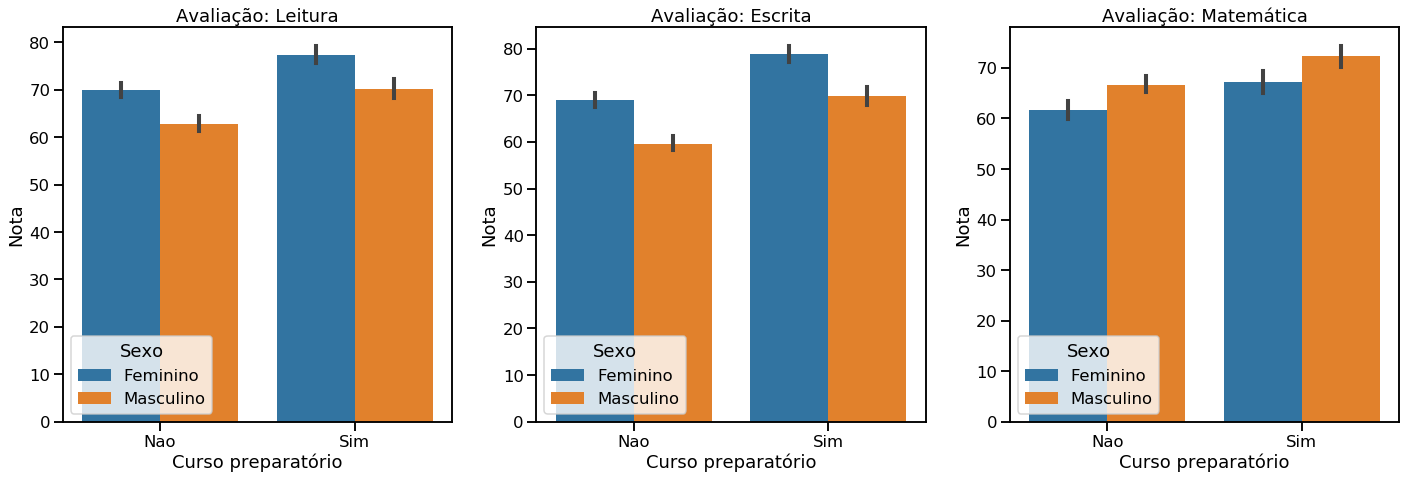

In [39]:
#Notas por Alunos que tiveram o curso preparatório divididos por Sexo

plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.barplot(x = 'test preparation course', y = 'reading score', hue = 'gender', data = df)
plt.xlabel('Curso preparatório')
plt.ylabel('Nota')
plt.title('Avaliação: Leitura')
plt.legend(title="Sexo")

plt.subplot(1,3,2)
sns.barplot(x = 'test preparation course', y = 'writing score',hue = 'gender', data = df)
plt.xlabel('Curso preparatório')
plt.ylabel('Nota')
plt.title('Avaliação: Escrita')
plt.legend(title="Sexo")

plt.subplot(1,3,3)
sns.barplot(x = 'test preparation course', y = 'math score',hue = 'gender', data = df)
plt.xlabel('Curso preparatório')
plt.ylabel('Nota')
plt.title('Avaliação: Matemática')
plt.legend(title="Sexo")

plt.tight_layout()

Bom, é um insigth meio óbvio, mas o gráfico demonstra que os estudantes que tiveram o curso preparatório tiveram notas melhores em todas 3 avaliações independente do Sexo. 

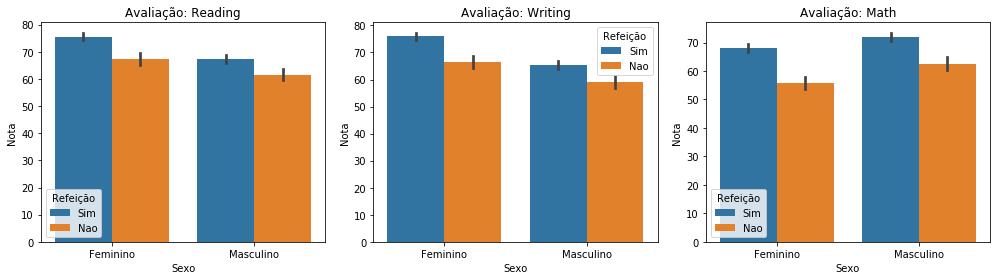

In [31]:
#Notas por Alunos por sexo dividos pelo lunch

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'reading score', hue = 'lunch', data = df)
plt.xlabel('Sexo')
plt.ylabel('Nota')
plt.title('Avaliação: Reading')
plt.legend(title="Refeição")

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writing score',hue = 'lunch', data = df)
plt.xlabel('Sexo')
plt.ylabel('Nota')
plt.title('Avaliação: Writing')
plt.legend(title="Refeição")

plt.subplot(1,3,3)
sns.barplot(x = 'gender', y = 'math score',hue = 'lunch', data = df)
plt.xlabel('Sexo')
plt.ylabel('Nota')
plt.title('Avaliação: Math')
plt.legend(title="Refeição")

plt.tight_layout()

Os gráficos acima demonstram que os alunos independentes do Sexo que tiveram uma refeição antes das avaliações alcançaram uma nota melhor. 

# DASHBOARD

In [33]:
#Função utilitaria
def hide_axes(axes):
    axes.set_frame_on(False)
    [n.set_visible(False) for n in axes.get_xticklabels() + axes.get_yticklabels()]
    [n.set_visible(False) for n in axes.get_xticklines() + axes.get_yticklines()]

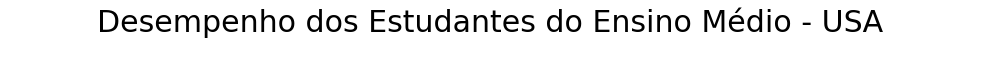

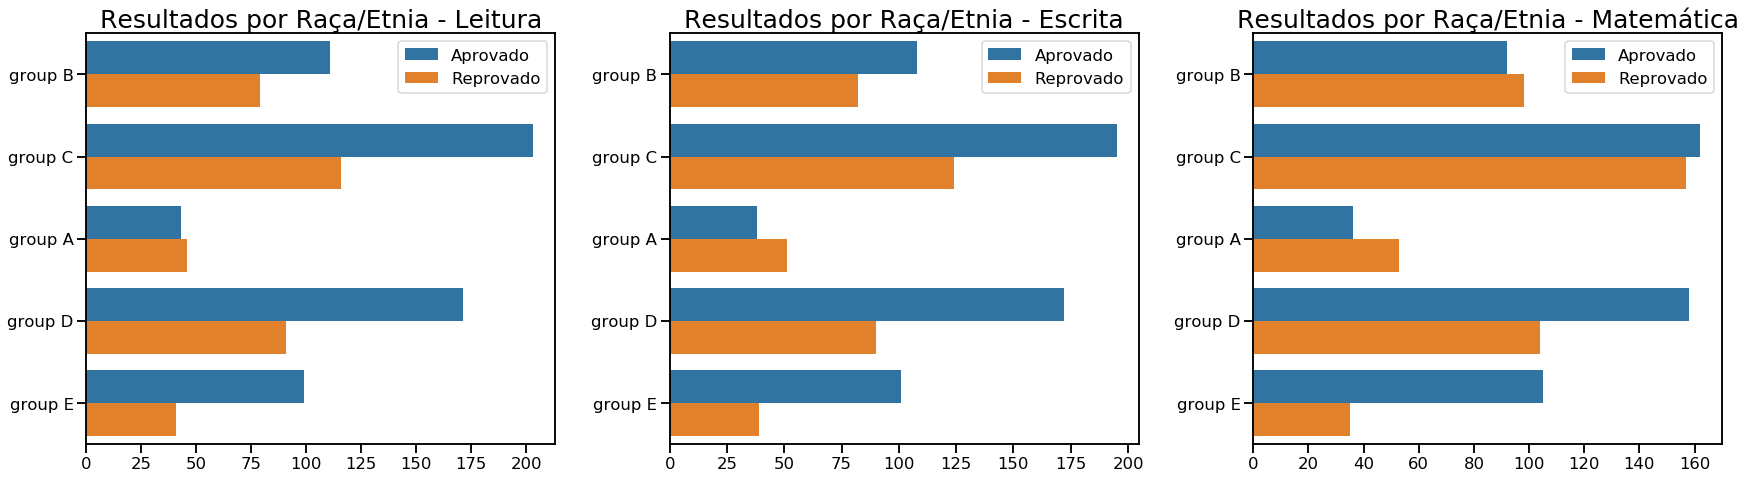

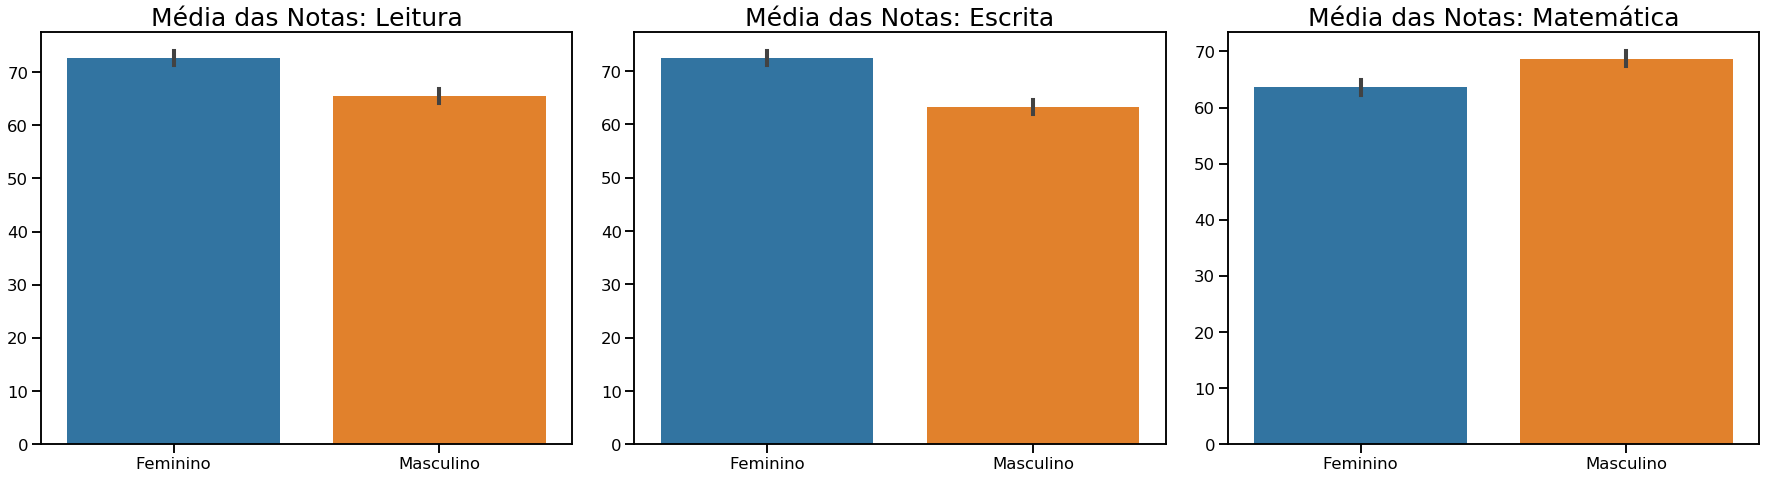

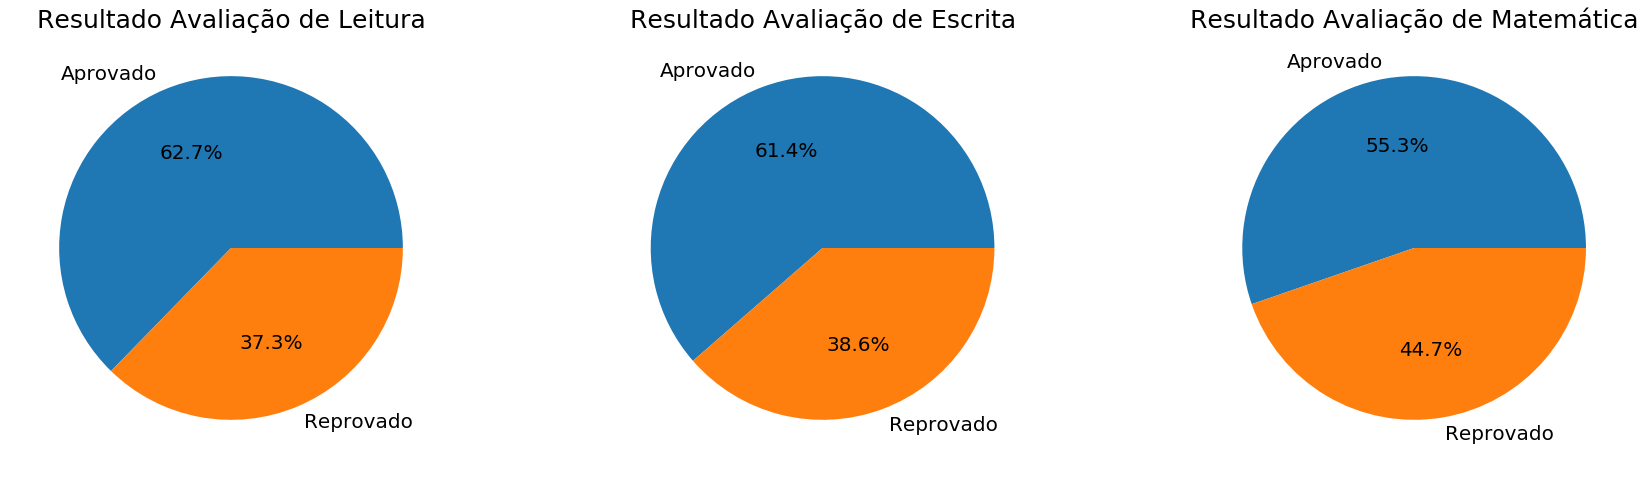

In [57]:
#Inicio
sns.set_context("talk")
figure = plt.figure(figsize = (17, 15))
gs_master = mpl.gridspec.GridSpec(4, 2, 
                                  height_ratios = [1, 24, 128, 32], 
                                  hspace = 0, 
                                  wspace = 0)

# Camada 1 - Título do Dash
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs_master[0, :])
title_axes = figure.add_subplot(gs_1[0])
title_axes.set_title("Desempenho dos Estudantes do Ensino Médio - USA", fontsize = 30, color = "black")
hide_axes(title_axes)

# Camada 2

plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
sns.countplot(y = 'race/ethnicity', hue = 'reading_resultado', data = df)
plt.xlabel('')
plt.ylabel('')
plt.title('Resultados por Raça/Etnia - Leitura',fontsize=25)
plt.legend(title="")

plt.subplot(1,3,2)
sns.countplot(y = 'race/ethnicity', hue = 'writing_resultado', data = df)
plt.xlabel('')
plt.ylabel('')
plt.title('Resultados por Raça/Etnia - Escrita',fontsize=25)
plt.legend(title="")

plt.subplot(1,3,3)
sns.countplot(y = 'race/ethnicity', hue = 'math_resultado', data = df)
plt.xlabel('')
plt.ylabel('')
plt.title('Resultados por Raça/Etnia - Matemática',fontsize=25)
plt.legend(title="")

plt.tight_layout()

#Camada 3
plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'reading score', data = df)
plt.xlabel('')
plt.ylabel('')
plt.title('Média das Notas: Leitura',fontsize=25)

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writing score', data = df)
plt.xlabel('')
plt.ylabel('')
plt.title('Média das Notas: Escrita',fontsize=25)

plt.subplot(1,3,3)
ax=sns.barplot(x = 'gender', y = 'math score', data = df)
plt.xlabel('')
plt.ylabel('')
plt.title('Média das Notas: Matemática',fontsize=25)

plt.tight_layout()

# Camada 4
plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
nivel1 = df['reading_resultado'].value_counts()
labels1=nivel1.index
explode=[0, 0]
values1=nivel1.values

plt.pie(values1,explode=explode,labels=labels1,autopct='%1.1f%%',textprops={'fontsize': 20})
plt.title('Resultado Avaliação de Leitura',color='black',fontsize=25)

plt.subplot(1,3,2)
nivel2 = df['writing_resultado'].value_counts()
labels2=nivel2.index
explode=[0, 0]
values2=nivel2.values

plt.pie(values2,explode=explode,labels=labels2,autopct='%1.1f%%',textprops={'fontsize': 20})
plt.title('Resultado Avaliação de Escrita',color='black',fontsize=25)

plt.subplot(1,3,3)
nivel3 = df['math_resultado'].value_counts()
labels3=nivel3.index
explode=[0, 0]
values3=nivel3.values

plt.pie(values3,explode=explode,labels=labels3,autopct='%1.1f%%',textprops={'fontsize': 20})
plt.title('Resultado Avaliação de Matemática',color='black',fontsize=25)














#ESPAÇO SOMENTE PARA AGRUPAR A VISUALIZACAO NO PDF





plt.tight_layout()
plt.show()


# Conclusão

Finalizando a tarefa, esse dashboard acima, mostra 3 camadas de resultados do desempenho dos estudantes. Na primeira camada é demonstrado o desempenho por matéria agrupados por grupo de etnia/raça, na segunda camada temos os resultados por matéria agrupados por sexo e na última camada temos o resultado geral de aprovação dos alunos (nota de corte de 65 pontos) nas 3 matérias. 

Um insigth geral demonstra que a matéria Math é realmente a mais difícil de se obter aprovação, mas que os estudantes do grupo D de sexo masculino tiveram um melhor desempenho geral nela. 

## FIM

## OBRIGADO